In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_columns', None,'display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
Member = pd.read_csv('~/Box Sync/KenyaPovertyTargetingModel/1data/KSPS/UNHCR-KEN-2018-SEA-Kalobeyei-Member.csv')
Nonfood = pd.read_csv('~/Box Sync/KenyaPovertyTargetingModel/1data/KSPS/UNHCR-KEN-2018-SEA-Kalobeyei-Nonfood.csv')

In [3]:
# Nonfood cleaning

Nonfood = Nonfood.rename(columns={"s1q2":"hhlocation", 
                        "s12q9":"purchased", 
                        "s12q10": "cost"})

Nonfood = Nonfood.drop(['weight','g_recall','nfcons_value',
                        'nfcons_value_capita','popweight',
                        's12q11'], axis=1)

NFSum = pd.DataFrame(Nonfood.groupby('hhid')['cost'].sum())

In [4]:
# Member cleaning
Member = Member.rename(columns={"s1q2":"hhlocation",
                                "s1q5":"interviewConsent",
                                "s2q8":"mainRespondent",
                                "s2q18":"hhHead",
                            #Demographic
                                "s2q11":"gender",
                                "s2q12":"ageRange",
                                "s2q13":"countryOfOrigin",
                            #Education
                                "s4q1":"anyEducation",
                                "s4q2":"currentlyInSchool",
                                "s4q3":"currentGrade",
                                "s4q4":"highestEducation",
                            ## Education -- Skills
                                "s4q5":"speaks",
                                "s4q6":"reads",
                                "s4q7":"writes",
                                "s4q8":"usesTech",
                                "s4q9":"drives",
                            # Employment 
                                "s5q1":"employee",
                                "s5q2":"employer",
                                "s5q3":"farmWorker",
                                "s5q4":"farmHelper",
                                "s5q5":"apprentice",
                                "s5q6":"volunteer",
                                "s5q20":"occupationStatus",
                                "s5q24":"numberOfIncomeActivities7days",
                            # Disabilities
                                "s9q2":"DifficultSeeing",
                                "s9q2_a":"glasses",
                                "s9q3":"DifficultHearing",
                                "s9q3_a":"hearingAid",
                                "s9q4":"difficultWalking",
                                "s9q5":"difficultMemory",
                                "s9q6":"difficultSelfCare",
                                "s9q7":"difficultCommunicate"})


Member = Member.drop(['weight',
# s5q7-14 ask about absenteeism at work
's5q7','s5q8','s5q9','s5q10','s5q11','s5q12','s5q13_1','s5q13_2','s5q13_3','s5q14','s5q14_b',
# s5q17-19 asks about what steps were taken in subject's job search
's5q17','s5q18','s5q19',
# s5q22 "How soon would he/she be able to start work if offered one"                 
's5q22',
# s5q23 is covered in s5q20
's5q23',
# Dr. told me to remove these
's5q25','s5q15','s5q16','s5q21','mainRespondent',
# Mean was 1                    
'interviewConsent' ,  
# Included in other sets
'ind_unique','indid','hhlocation',"s2q7a"
], axis=1)

MemberRaw=Member.copy()


In [5]:
## Cleaning variable inputs
Member.hhHead = MemberRaw.hhHead.map(dict(Yes=1, No=0))
Member.gender = MemberRaw.gender.map(dict(Female=1, Male=0))
Member.anyEducation = MemberRaw.anyEducation.map(dict(Yes=1, No=0))
Member.speaks = MemberRaw.speaks.map(dict(Yes=1, No=0))
Member.reads = MemberRaw.reads.map(dict(Yes=1, No=0))
Member.writes = MemberRaw.writes.map(dict(Yes=1, No=0))                                    
                                     

                                     


In [6]:
## Age Manipulation
ageDict = {"00 to 04": 0,
           "05 to 09": 1,
           "10 to 14": 2,
           "15 to 19": 3,
           "20 to 24": 4,
           "25 to 29": 5,
           "30 to 44": 6,
           "35 to 39": 7,
           "40 to 44": 8,
           "45 to 49": 9,
           "50 to 54": 10,
           "55 to 59": 11,
           "60 or more": 12}

Member.ageRange=Member.ageRange.replace(ageDict)


In [7]:
# combine highest education and current grade
Member.highestEducation = Member.highestEducation.fillna(Member.currentGrade)
Member.highestEducation = Member.highestEducation.fillna(0)
# turn into numbers
eduDict = {"Early childhood education":1,
           "Primary": 2,
           "Secondary": 3,
           "Vocational training (more than 1 year, with government certificate)":4,
           "University":5,
           "Other": 6}

Member.highestEducation=Member.highestEducation.replace(eduDict)

Member


,hhid,hhHead,gender,ageRange,countryOfOrigin,anyEducation,currentlyInSchool,currentGrade,highestEducation,speaks,reads,writes,usesTech,drives,employee,employer,farmWorker,farmHelper,apprentice,volunteer,occupationStatus,numberOfIncomeActivities7days,DifficultSeeing,glasses,DifficultHearing,hearingAid,difficultWalking,difficultMemory,difficultSelfCare,difficultCommunicate,hhsize,famnum,famsize,speak_arabic,speak_english,speak_swahili,speak_other,read_arabic,read_english,read_swahili,read_other,write_arabic,write_english,write_swahili,write_other
0,10,1,1,7.0,South Sudan,1.0,No,NaN,2,1.0,1.0,1.0,No,No,No,No,Yes,No,No,Yes,NaN,0.0,Yes – a lot of difficulty,No,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,5,1,5,yes,NaN,NaN,yes,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN
1,10,0,1,2.0,South Sudan,1.0,Yes,Secondary,3,1.0,1.0,1.0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,5,1,5,yes,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN
2,10,0,0,1.0,South Sudan,1.0,Yes,Primary,2,1.0,1.0,1.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes – a lot of difficulty,No,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,5,1,5,yes,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN
3,10,0,1,1.0,South Sudan,1.0,Yes,Primary,2,1.0,1.0,1.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,5,1,5,yes,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN
4,10,0,1,0.0,South Sudan,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,5,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,6004,0,1,1.0,South Sudan,1.0,Yes,Early childhood education,1,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes – some difficulty,No,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,12,1,9,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6330,6004,0,0,0.0,South Sudan,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6331,6004,0,1,12.0,South Sudan,0.0,NaN,NaN,0,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,12,2,3,yes,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6332,6004,0,1,1.0,South Sudan,1.0,Yes,Early childhood education,1,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,12,2,3,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Create DF to test data regarding head of household
HeadMember = Member.query('hhHead==1')


foo=pd.DataFrame({
# Column to count hhsize
    'size': Member.groupby('hhid')['gender'].count(),
# Colomn for houshold head is female 
    'headFemale':HeadMember.groupby('hhid')['gender'].mean(),
# Column for share of house is female
    'shareFemale':Member.groupby('hhid')['gender'].mean(),
# Share by Age stuff
    'shareAgeZeroToFour':Member.query('ageRange==0').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFiveToNine':Member.query('ageRange==1').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeTenToFourteen':Member.query('ageRange==2').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFifteenToTwentyfour':Member.query('ageRange==3|ageRange==4').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeTwentyfivetofourtynine':Member.query('ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFiftyPlus':Member.query('ageRange==10|ageRange==11|ageRange==12').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareMaleAgeTenToNineteen':Member.query('gender==0&(ageRange==2|ageRange==3)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareFemaleAgeTenToNineteen':Member.query('gender==1&(ageRange==2|ageRange==3)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareMaleAgeTwentytoFourtynine':Member.query('gender==0&(ageRange==4|ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareFemaleAgeTwentytoFourtynine':Member.query('gender==1&(ageRange==4|ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
# Highest Education Shares
    'shareWithNoEducation': Member.query('highestEducation==0 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithEarlyChildhood': Member.query('highestEducation==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithPrimary':Member.query('highestEducation==2 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithSecondary':Member.query('highestEducation==3 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithVocational':Member.query('highestEducation==4 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithUniversity':Member.query('highestEducation==5 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithOther':Member.query('highestEducation==6 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
# Share 5-10 that speaks
    'shareSpeaks': Member.query('speaks==1 & ageRange==1').
                        groupby('hhid')['speaks'].count()/
                        Member.query('ageRange==1').
                            groupby('hhid')['ageRange'].count(),
# Reads
    'shareReads':Member.query('reads==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWrites':Member.query('writes==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    })

# change it to NA if there is no person for the last ones for share speaks

foo.shareSpeaks.min()

0.5

In [9]:
Nonfood.describe()

,hhid,hhsize,hhmod,cost
count,30861.000000,30861.000000,30861.000000,19058.000000
mean,2932.105214,5.997116,1.974952,32.681817
std,1718.510964,3.154166,0.817177,104.560583
min,10.000000,1.000000,1.000000,0.768703
25%,1443.000000,4.000000,1.000000,7.777780
50%,2843.000000,6.000000,2.000000,19.444400
75%,4442.000000,8.000000,3.000000,35.000000
max,6004.000000,21.000000,3.000000,10000.000000


In [10]:
NFSum

,cost
hhid,
10,1031.994440
11,94.158150
12,282.654090
14,159.810690
15,596.885089
...,...
5977,210.000000
5986,618.490350
5992,0.000000


In [11]:
Nonfood.isnull().sum()

hhid              0
hhlocation        0
hhsize            0
hhmod             0
mod_opt           0
item_name         0
purchased         0
cost          11803
dtype: int64

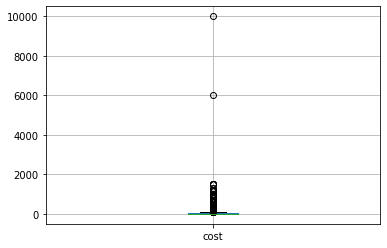

In [12]:
Nonfood.boxplot(column=['cost'])

In [13]:
#Outlier Treatment
Nonfood['cost'] = np.where(Nonfood['cost'] > 2000, 2000, Nonfood['cost'])

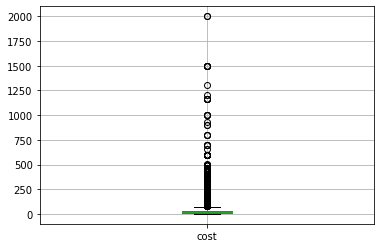

In [14]:
#Even using outliers it still looks skewed 
Nonfood.boxplot(column=['cost'])

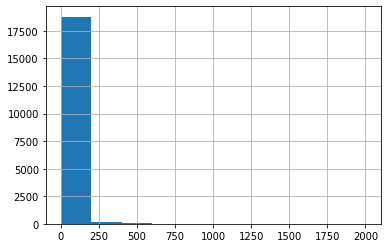

In [15]:
#Most households have a cost of zero and the 20 mean is just due to the very high numbers 
Nonfood.cost.hist()

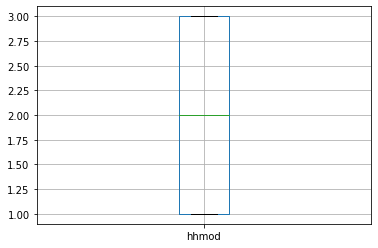

In [16]:
Nonfood.boxplot(column=['hhmod'])

In [22]:
foo[['headFemale', 'shareFemale','shareAgeZeroToFour','shareAgeFiveToNine', 'shareAgeTenToFourteen', 
    'shareAgeFifteenToTwentyfour', 'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus','shareMaleAgeTenToNineteen',
    'shareFemaleAgeTenToNineteen', 'shareMaleAgeTwentytoFourtynine', 'shareFemaleAgeTwentytoFourtynine',
    'shareWithNoEducation', 'shareWithEarlyChildhood', 'shareWithPrimary', 'shareWithSecondary', 'shareWithVocational',
    'shareWithUniversity', 'shareWithOther', 'shareSpeaks', 'shareReads', 'shareWrites']].describe().T[['mean', 'std', 'count']].set_axis(['Head Female', 'Share Female', '% Members Aged 0-4', '% Members Aged 5-9',
                                                                                                                                          '% Members Aged 10-14', '% Members Aged 15-24', '% Members Aged 25-49',
                                                                                                                                          '% Members Over Age 50', '% Male Members Aged 10-19', '% Female Members Aged 10-19',
                                                                                                                                          '% Male Members Aged 20-49', '% Female Members Aged 20-49', '% Members with No Education',
                                                                                                                                          '% Members with Early Childhood Education', '% Members with Primary Education',
                                                                                                                                          '% Members with Secondary Education',  '% Members with Vocational Education',
                                                                                                                                           '% Members with University Education',  '% Members with Other Education',
                                                                                                                                           '% Members who Speak', '% Members who Read', '% Members who Write'], axis = 'index').set_axis(['Mean', 'Std', 'N'], axis='columns')                      




,Mean,Std,N
Head Female,0.656364,0.475138,1100.0
Share Female,0.486591,0.256838,1100.0
% Members Aged 0-4,0.278743,0.125796,752.0
% Members Aged 5-9,0.283456,0.122885,735.0
% Members Aged 10-14,0.256091,0.118724,632.0
% Members Aged 15-24,0.350387,0.239102,694.0
% Members Aged 25-49,0.286426,0.225117,842.0
% Members Over Age 50,0.210087,0.188762,75.0
% Male Members Aged 10-19,0.286679,0.184233,599.0
% Female Members Aged 10-19,0.240616,0.134659,527.0
